# Discovering the Lost City of Z Using Multimodal LLMs and Satellite Imagery

From this lab, you will learn the following concepts in AI science 
- Large Language Models (LLMs)
- Multimodal machine learning 
- Data Science Metrics: Precision, Recall, Accuracy
- Few-shot learning in Generative AI

## Introduction

[wikipedia](https://en.wikipedia.org/wiki/Lost_City_of_Z)
The Lost City of Z is the name given by Colonel Percy Harrison Fawcett, a British surveyor of the early 20th century, to an indigenous city that he believed had existed in the jungle of the Mato Grosso state of Brazil. Based on early histories of South America and his own explorations of the Amazon River region, Fawcett theorized that a complex civilization had once existed there, and that isolated ruins may have survived. Fawcett and two companions disappeared during an expedition to find evidence of the hypothesized civilization in 1925.

In this lab, we will leverage Multimodal LLMs to discover evidence to the lost city of Z in the Amazon Rainforest. We will predict the potential archeological sites from mining satellite imagery.

<audio controls>
  <source src="https://storage.googleapis.com/arcknow-test-public/arcknow-labs/lost-city-of-z-intro.mp3" type="audio/mp3">
  Your browser does not support the audio element.
</audio>

<details>
    <summary>Transcripts</summary>
    Deep in the Amazon rainforest lies the legend of the Lost City of Z—an ancient civilization hidden for centuries. Inspired by the real-life expeditions of British explorer Percy Fawcett, who vanished while searching for this city in 1925, our lab will take you on a modern scientific quest to find evidence of its existence.

    But instead of hacking through dense jungle, you'll harness the power of cutting-edge AI science to reveal hidden patterns in data. In this hands-on lab, you’ll learn how to combine satellite imagery, textual descriptions, and machine learning models to identify potential archaeological sites in the Amazon.

    We’ll use Multimodal Large Language Models (LLMs) to analyze and interpret diverse data sources—from high-resolution imagery to historical texts—just as Fawcett pieced together clues from maps and oral histories. You’ll master the skills to evaluate AI predictions with Data Science Metrics like Precision, Recall, and Accuracy, ensuring your models deliver reliable insights.

    You’ll also explore advanced AI concepts essential for real-world problem-solving:

    - Large Language Models (LLMs): Understanding and leveraging state-of-the-art generative models
    - Multimodal Machine Learning: Integrating text, images, and other data types to enrich predictions
    - Few-Shot Learning: Teaching models to generalize from limited examples, crucial for rare archaeological patterns

    By the end of this lab, you won’t just learn about AI—you’ll apply it as an explorer would, investigating the uncharted and solving mysteries with data. Get ready to turn your curiosity into discovery and your code into a powerful research tool in the quest for the Lost City of Z.
</details>

## Problem Setting

Our goal is to leverage AI to detect unknown archaeological sites hidden in the Amazon by learning patterns from known sites. We’ll break this high-level objective into a machine learning problem in three steps: 1) Understand what we know, 2) Identify patterns from what we know, and 3) Define a concrete machine learning problem statement.

**What do we know?**

By following James Q. Jacobs [blog](https://www.jqjacobs.net/blog/), we can locate the known archelogical sites in Amazon on Google Earth. 

<img src="https://storage.googleapis.com/arcknow-test-public/known_sites_googleearth.jpg" alt="Drawing" style="width: 700px;"/>

**Identify the patterns**

When we zoom in on satellite imagery in Google Earth, we notice something fascinating:

Many of these ancient sites show artificially shaped depressions in the land.

These aren’t random clearings or natural erosion—they often have:
- Geometric shapes
- Straight edges or symmetrical curves
- Patterns suggesting human design

By carefully examining these visual cues, we’re learning the signature of ancient human settlement from the air.

<table><tr>
<td> <img src="https://storage.googleapis.com/arcknow-test-public/new_site_googleearth.jpg" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="https://storage.googleapis.com/arcknow-test-public/acrs33_known_sites_googleearth.jpg" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

**Problem Statement**

Here’s our challenge in AI terms: 

*Can we teach a model to detect these artificial-shaped depressions automatically, at scale?*

To solve this, we’ll leverage Multimodal Large Language Models (LLMs). Now we have a concrete problem statement for this lab:

*Use multimodal LLMs to detect artificially shaped depressions of land in Google Earth satellite imagery.*

## Baseline

**Concept Explain: Large Language Models & Multimodal Machine Learning**

<img src="https://storage.googleapis.com/arcknow-test-public/arcknow-labs/multimodal-llms.png" alt="Drawing" style="width: 700px;"/>

<audio controls>
  <source src="https://storage.googleapis.com/arcknow-test-public/arcknow-labs/mllms-explain.mp3" type="audio/mp3">
  Your browser does not support the audio element.
</audio>

<details>
    <summary>Transcripts</summary>
    Before we implement the baseline, I’d like to briefly explain the concept of multimodal large language models (MLLMs).
    

    First, let’s understand what large language models (LLMs) are and how they work. LLMs are a type of deep learning model designed to handle text data. Popular examples include ChatGPT, Gemini, LLaMA, and DeepSeek. Technically, LLMs are sequence-to-sequence models.

    In language generation tasks, they take an input sequence of words and produce an output sequence of words. For example, given the input:

    “The cat sat on the”

    the model might generate:

    “mat and purred loudly,”

    by predicting the most likely continuation of the text.

    Now, let’s clarify what multimodal machine learning means.

    Traditionally, machine learning models are designed to handle a single type of input:

    Regression models process numerical inputs.

    Natural language processing models handle text.

    Computer vision models analyze images.

    In contrast, multimodal machine learning models are designed to process multiple types of input simultaneously—for example, text and images together. This enables them to achieve a more holistic understanding, similar to how humans integrate information from multiple senses.

    Multimodal LLMs are large language models that can handle and reason over multiple data types at once, such as images and text. For example, a user can ask a text question about one or more images and receive an answer that combines understanding from both modalities.

    In the following coding lab, I will demonstrate how to use Gemini 2.0 Flash to “see” satellite images and “understand” the textual task description in order to identify archaeological sites.
</details>


Based on the satellite image, there is a high probability of an archaeological site present at the coordinates 9°51'19.2"S 67°13'56.4"W.

Here's my reasoning:

1.  **Geometric Shape:** The image shows a distinct square/rectangular feature. This regular shape is visible in the vegetation pattern and can be seen clearly. Such geometric shapes are not commonly found in nature and often indicate human construction.
2.  **Vegetation Patterns:** The vegetation is distinctly different within and outside the square, suggesting underlying structures or modified soil conditions. Vegetation can thrive differently over buried walls, ditches, or mounds, revealing hidden archaeological features.
3.  **Location and Context:** The surrounding area seems to be predominantly agricultural land. The presence of a square enclosure in this context suggests it might not be a natural feature but rather something related to past land use, settlement, or ritual activity.
4.  **Earthworks or Mounds:** There are slight variations in elevation within the rectangular feature. Even minor changes in topography can suggest the presence of buried earthworks or mounds that are indicative of archaeological sites.

While further ground investigation is needed to confirm the presence and nature of the archaeological site, the features visible in the satellite image strongly suggest its existence. High-resolution imagery, LiDAR data, and ground surveys can help determine the precise nature and significance of this potential site.

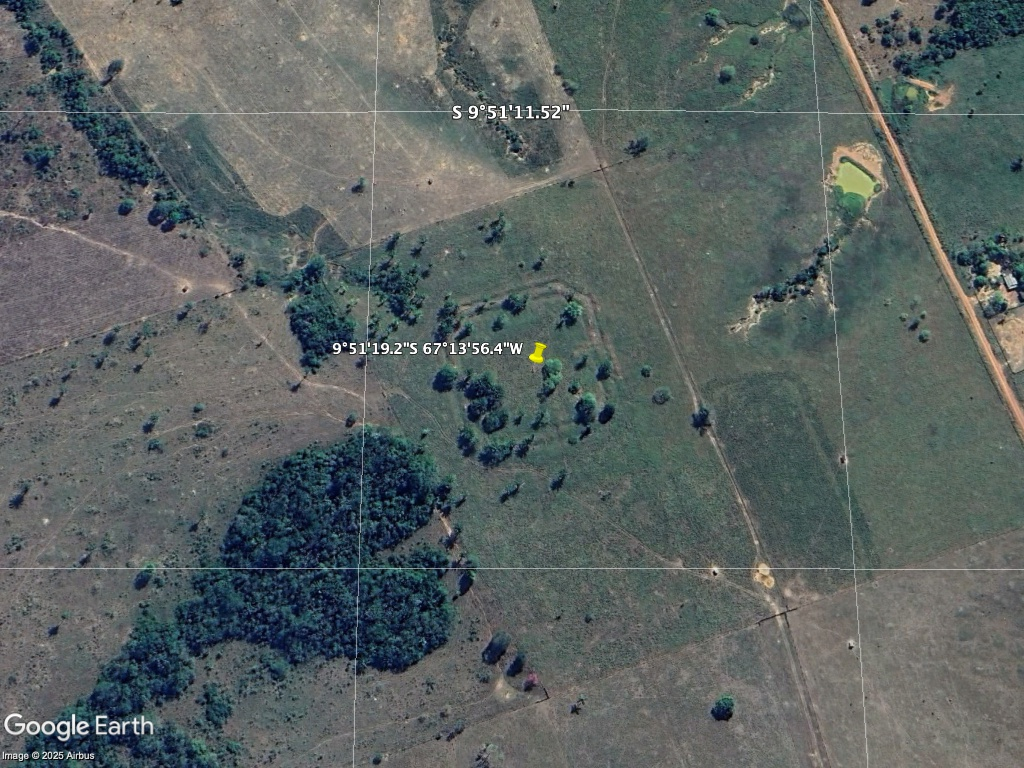

In [ ]:
# Leverage MLLMs to identify archeological sites from satellite imagery
# Update the prompt to observe changes in the LLM output 
from google import genai
import requests
from PIL import Image
from IPython.display import Markdown, display

client = genai.Client()

fp = "https://storage.googleapis.com/arcknow-test-public/new_site_googleearth.jpg"
im = Image.open(requests.get(fp, stream=True).raw)
prompt = """
You are an expert for discovering archeology sites. 
Tell me if there is a archeological site in the given satellite image. 
Tell me how did you reach the conclusion.
"""

result = client.models.generate_content(
        model="gemini-2.0-flash",
        contents = [prompt, im]
)

display(Markdown(result.text))
display(im)